In [1]:
# import dependencies
# !pip install tensorflow==2.0.0-beta0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Generate sampling data
# Sample data points along the x axis
SAMPLES = 1000
#SEED values for uniform random data generation
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
# uniformly distributed set of random numbers in the range from
# 0 to 2*pi for one whole sine wave period
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

In [4]:
# Shuffle the x_values for the network to be more accurate
np.random.shuffle(x_values)
# print(x_values)

In [5]:
# corresponding y_values for x_values along the sine wave
# returns an array of y_vlaues
y_values = np.sin(x_values)

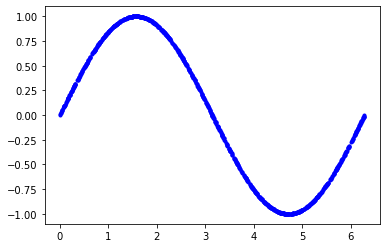

In [6]:
# Data plotting
# b. = blue dots
plt.plot(x_values, y_values, 'b.')
# plt.legend()
plt.show()

In [7]:
# Add noise to our datapoints for a real world scenario and plot it
print(type(y_values.shape)) 
print(type(*y_values.shape)) #Unpacking a tuple to intiger value as arguments to np.random.randn 

y_values += 0.1 * np.random.randn(*y_values.shape)
print(y_values.shape)

<class 'tuple'>
<class 'int'>
(1000,)


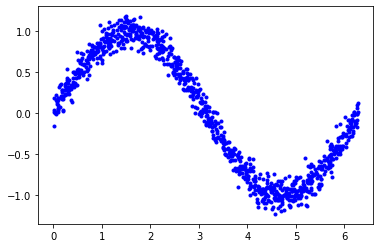

In [8]:
plt.plot(x_values, y_values, 'b.')
# plt.legend()
plt.show()

In [9]:
# Training, validation and testing dataset
# 60, 20, 20
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
print(TRAIN_SPLIT, TEST_SPLIT)

# Use of np.split to split at those indices passed as second argument as LIST
# here at 600 and 800
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

600 800


In [10]:
# Checking whether splits add upto sample size correctly
assert(x_train.size + x_validate.size + x_test.size) == SAMPLES

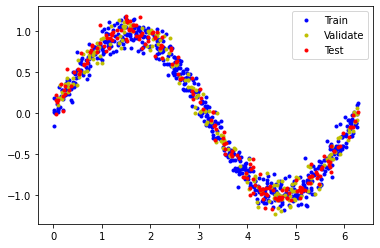

In [11]:
# Plot the Graph
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

In [ ]:
# Regression model - Used when Numeric value is the output
# Keras - A high level API on top of TF to create deep neural networks
from tensorflow.keras import layers
# Creation of sequential mode - neurons stacked on top of the next
model_1 = tf.keras.Sequential()

# Add two Dense layers - Fully connected layer
# Layer 1 has 16 neurons, ReLU - rectified linear unit activation returns max(0.0, input)
# based on weights and biases and an input shape of 1
# activation = activation_function((input * weight) + bias)
# Why RelU - To model complex non linear relationships
# ML engineers can experiment with different activation functions to find the one that suits the model
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer has one neuron, because we need one single numeric output
# No activation function since the raw output is desired
# output = sum((inputs * weights)) + bias
model_1.add(layers.Dense(1))

# Now optimise the model using a standard optimiser and loss function for regression
# Loss method - to measure the output deviation from reality
# mse - Mean Square Error loss function is used here
# metrics - used to specify additional functions to judge the performance of the model
# mae - Mean Absolute Error - helpful to measure performance of regression function
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print a summary information of the model architecture
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


First layer has 16 neurons with one weight each for the input. Hence there are 16 paremeters here. In the second layer, one neuron has 16 connections and each connection is assigned a different weight. Hence, 16 parameters 
The total weights are 32 and each neuron has a bias accounting for 17 biases
Hence the total parameters are **32 + 17 = 49**

In [ ]:
# Training our Model
# training the model is through fitting the model to the data points
# This is performed by calling the fit() method
# Pass inputs and labels of our training data set, set the iterations through epoch
# x_train, y_train - values of our training data set
# epochs - number of iterations over which training takes place
# batch_size - Select a batch of random data points, feed it to the model for inference
#   and calculate the aggregate loss on those data points and update the model's
#   weights and biases through back propogation.
# validation_data - specify  our validation dataset, data from this dataset
#   is fed to the network all through the training process and
#   network predictions are compared with expected values

history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
            validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 [==============================] - 1s 5ms/step - loss: 0.7994 - mae: 0.7884 - val_loss: 0.5914 - val_mae: 0.6926
Epoch 2/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4854 - mae: 0.6188 - val_loss: 0.4723 - val_mae: 0.6022
Epoch 3/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4214 - mae: 0.5637 - val_loss: 0.4276 - val_mae: 0.5725
Epoch 4/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3848 - mae: 0.5383 - val_loss: 0.3897 - val_mae: 0.5418
Epoch 5/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3516 - mae: 0.5157 - val_loss: 0.3540 - val_mae: 0.5120
Epoch 6/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3197 - mae: 0.4915 - val_loss: 0.3251 - val_mae: 0.4877
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.2932 - mae: 0.4701 - val_loss: 0.3007 - val_mae: 0.4722
Epoch 8/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.

Training Metrics
loss, mae, val_loss, and val_mae

**loss** - This is the output of our loss function - mse. It's a positive number.
Smaller the loss value, better the performance.

**mae** - mean absolute error of our training data. average difference between the  network predictions and the expected y values from the training data

**val_loss** - loss function on our validation data
  if *val_loss > loss*, then our network is overfitting

**val_mae** - mae for our validation data. 
  if *val_mae > mae*, then our network is overfitting


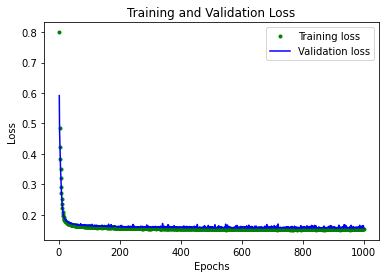

In [ ]:
# Graphing the History
# Figuring why our model is performing poor on the network
# .history is a dictionary recording metric values during training and validation 
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
# print(history_1.history['loss'], "*"*5, history_1.history['val_loss'])
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Our goal is to stop training when model is no longer improving or 
val_loss < loss

The loss drops exponentially in the first 100 epochs. lets Skip them to read the graph more carefully

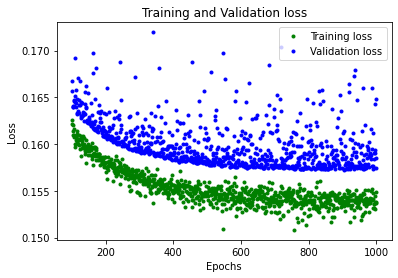

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We notice that the loss continues to decrease till 600 epochs, after which it is mostly stable meaning no need to train our data after 600 epochs

Yet, Lowest loss value is 0.15 which is still higher.

Let's plot more metrics on our plot for better insights

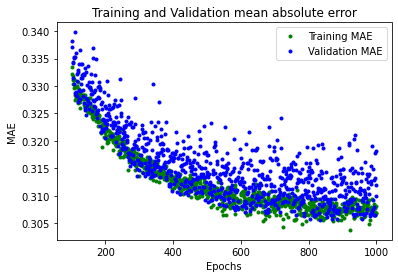

In [ ]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the predictions
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and Validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

Evidently, mae < val_mae . Hence signs of overfitting
Also, MAE values are quite high ~0.31, meaning model predictions are wrong by at least 0.31. which are very far from accurately modeling the sine wave


Let's plot our network predictions for our training data against the labels or expected values

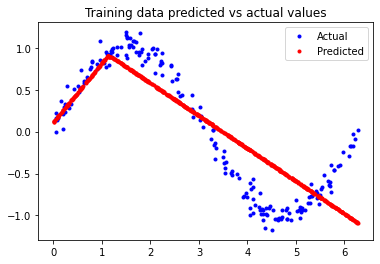

In [ ]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)

# Plot the predicitions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

Predicitons are highly linear, only roughly fit the data.

Rigidity of this fit suggests that the model does not have enough capacity to learn the full complexity of the sine wave function. It was only able to approximate it in an overly simplistic way.

Let's try and make the model bigger by adding an extra layer of neurons

In [19]:
from tensorflow.keras import layers
model_2 = tf.keras.Sequential()

model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


*weights in model_2* 

(1 * 16) + (16 * 16) + (16 * 1) = 288

*biases in model_*2

16 + 16 + 1 = 33

**Total = 321**

model_1 = 49

*model_2 is 555% increase in size of model_1*

---




In [20]:
# Let's run the model for 600 epochs instead of 1000
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
            validation_data=(x_validate, y_validate))


Epoch 1/600
38/38 [==============================] - 1s 9ms/step - loss: 0.3878 - mae: 0.5369 - val_loss: 0.3631 - val_mae: 0.5215
Epoch 2/600
38/38 [==============================] - 0s 2ms/step - loss: 0.3163 - mae: 0.4900 - val_loss: 0.3097 - val_mae: 0.4740
Epoch 3/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2656 - mae: 0.4497 - val_loss: 0.2580 - val_mae: 0.4374
Epoch 4/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2289 - mae: 0.4178 - val_loss: 0.2239 - val_mae: 0.4079
Epoch 5/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2045 - mae: 0.3960 - val_loss: 0.1986 - val_mae: 0.3841
Epoch 6/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1874 - mae: 0.3768 - val_loss: 0.1915 - val_mae: 0.3689
Epoch 7/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1805 - mae: 0.3666 - val_loss: 0.1872 - val_mae: 0.3722
Epoch 8/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1761 - m

val_loss came down from 0.17 to 0.01

val_mae came down from 0.32 to 0.08

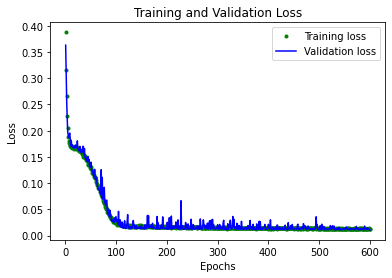

In [21]:
# Plotting graph for loss in model_2

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

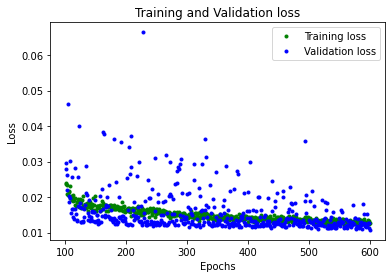

In [22]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

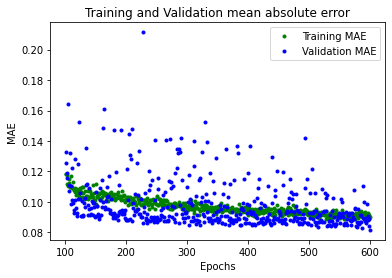

In [23]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the predictions
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and Validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

Metrics are boradly better for validation than training, which means the network is not overfitting
The overall loss  and mae are much better than in our previous network.


Validation metrics are calculated at the end of each epoch
whereas training metrics are calculated while the epoch of training is still in progress. 

This means validation happens on a model that has been trained for slightly longer

7/7 [==============================] - 0s 2ms/step - loss: 0.0089 - mae: 0.0737


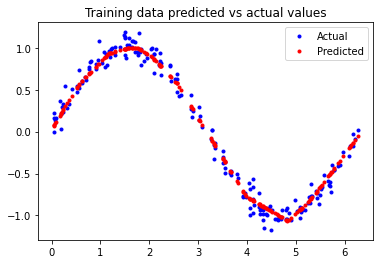

In [24]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)

# Use the model to make predictions from our validation data
predictions = model_2.predict(x_test)

# Plot the predicitions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

TensorFlow  has two main components

1.   **TensorFlow Lite Converter**


> To convert TF models into Space efficient format and aooly optimizations to shrink the model size and make it run faster


2.   **TensorFlow Lite Interpreter**

> Runs the TF Lite model using the most efficient client operations for a given device




  



a.   Conversion of TF Lite model using TF Lite Converer's Python API

> It takes our Keras model and writes it to disk in the form of a FlatBuffer - A special file format designed to be space-efficient.


b.   Optimizations are also performed but this may come at the cost of reduction of accuracy.

> Example - Quantization. By default, weights and biases are stored as 32-bit floating point numbers, so high precision calculations can take place during training. Whereas, Quantization allows you to reduce the precision of these numbers to 8-bit integers -- reduction in size by 4 times. CPU performs math with integers faster than floats.

> Quantization often results in minimal loss in accuracy. It makes it worthwhile to deploy in memory constrained devices.

















In [25]:
# Convert the model to the TF Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save the model to the disk
open("sine_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp3k3d0iec/assets


2892

In [26]:
#  Convert the model to the TF Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)

# Indicate that we want to perform the default optimizations
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
print(converter.optimizations)

# Define a gnerator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in x_test:
    # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield[np.array(value, dtype=np.float32, ndmin=2)]

converter.representative_dataset = representative_dataset_generator

# Convert the model
tflite_model = converter.convert()

# Save the model to the disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)

[<Optimize.DEFAULT: 'DEFAULT'>]
INFO:tensorflow:Assets written to: /tmp/tmpd8xu0cu_/assets


INFO:tensorflow:Assets written to: /tmp/tmpd8xu0cu_/assets


2696

> For a quantized model to run efficiently as possible, we need to provide a representative dataset - a set of numbers that represent the full range of input values of the dataset on which the model was trained.

> representative_dataset_generator() uses the yield operator to return test dataset's x values one by one

> we need to prove that these models are still accurate after conversion and quantization, we use both of them to make predictions and compare these against our test results. 

> We will use TF Lite interpreter for that purpose

To predict using TF Lite interpreter, we need to do the following
1. Instantiate an Interpreter object.
2. Call some methods that allocate memory for the model
3. Write the input to the input tensor.
4. Invoke the model.
5. Read the output from the output tensor.

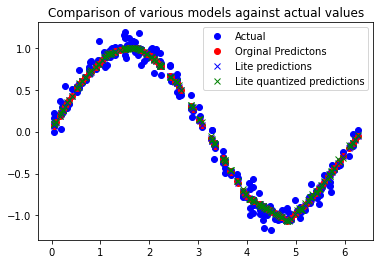

In [27]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = \
  sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = \
  sine_model_quantized.get_output_details()[0]["index"]

# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
  # Create a 2D tensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
  # Write the value to the input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  # Run inference
  sine_model.invoke()
  # Read the prediction from the output tensor
  sine_model_predictions.append(
      sine_model.get_tensor(sine_model_output_index)[0])
  # Do the same for quantized model
  sine_model_quantized.set_tensor(
      sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(
      sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])


# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Orginal Predictons')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', \
         label='Lite quantized predictions')
plt.legend()
plt.show()


In [28]:
# Comparing quantized models for difference in size
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference =  basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 2892 bytes
Quantized model is 2696 bytes
Difference is 196 bytes


> TF Lite's Python API uses the Interpreter constructor to load our model files from our disk.

> However, microcontrollers have no file system or if they had, extra code required to load a model from disk would be wasteful given our limited space.

>Instead, we provide the model in a C source file, which can be included in our binary and loaded directly into memory

> In the file, model is defined as an array of bytes. Fortunately, there's convenient **Unix tool named xxd** that is able to conovert a given file into the required format.

>Following cell runs xxd on our quantized model, writes the output to a file called ***sine_model_quantized.cc***, and prints it to the screen.

In [30]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
# Print the source file
!cat sine_model_quantized.cc

Selecting previously unselected package xxd.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.6_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.6) ...
Setting up xxd (2:8.0.1453-1ubuntu1.6) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
unsigned char sine_model_quantized_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00,
  0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00,
  0xb8, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00, 0x60, 0x00, 0x00, 0x00,
  0x58, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x98, 0x04, 0x00, 0x00,
  0xa4, 0x03, 0x00, 0x00, 0x68, 0x01, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0xb8, 0x00, 0x00, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x28, 0x0a, 0x00, 0x00,
  0x24, 0x0a, 0x00, 0x00, 0x20, 0x09,